## Exercise 10.1 - Rolling Dice

### Part a

In [1]:
import random
for i in range (2):
    print(random.randrange(1,7)) # Not the upper limit is 7, as the randrange function generates up to n-1 (6 in this instance)

3
1


### Part b

In [2]:
times = 1000000 # Number of times to run the loop
count = 0 # Initializes the number of double 6's to zero
target = 6 #Determines which number you are looking for double of

for i in range (times):
    a = random.randrange(1,7)
    b = random.randrange(1,7)
    if (a == b and a == target):
        count += 1

fraction = count / times
print (fraction) # Prints the number of times in the set of runs double sixes were rolled
print(1/36) # Printes the expected number of times double sixes were rolled

0.027788
0.027777777777777776


## Example 10.1 - Decay of an Isotope

Please enter number of Thallium atoms:1000
Please enter number of Lead atoms:0
Please enter time step in seconds:1
Please enter total time in seconds:10


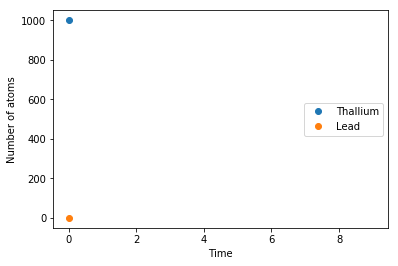

In [2]:
from random import random
from numpy import arange
from pylab import plot, xlabel, ylabel, show, legend

# Constants
NTl = int(input("Please enter number of Thallium atoms:")) # Number of thallium atoms
NPb = int(input("Please enter number of Lead atoms:")) # Number of lead atoms
tau = 3.053 * 60 # Half life of thallium in seconds
h = int(input("Please enter time step in seconds:")) # Size of time steps in seconds
p = 1 - 2**(-h/tau) # Probability of decay in one step
tmax = int(input("Please enter total time in seconds:")) # Total time

# Lists of plot points
tpoints = arange(0.0, tmax, h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    # Calculate the number of atoms that decay
    decay = 0
    for i in range (NTl):
        if random() < p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make a graph
plot(tpoints,Tlpoints,"o", label = "Thallium",markevery=20)
plot(tpoints,Pbpoints,"o", label = "Lead", markevery=20)
xlabel("Time")
ylabel("Number of atoms")
legend(loc = "best")
show()

The graph above displays the decay curves of thallium and lead. As can be seen, Thallium clearly models the standard exponential decay curve expected of a radioactive isotope, even with the random probability of decay. Equally, for every isotope decayed of Thallium, an equivalent amount of Lead is generated, as show by the opposing curve. While the possibility exists that Thallium would never decay, it can be seen that it still obeys expected behaviour, even if not perfectly, as shown by the jaggedness of the curve.

## Exercise 10.2 - Radioactive Decay Chain

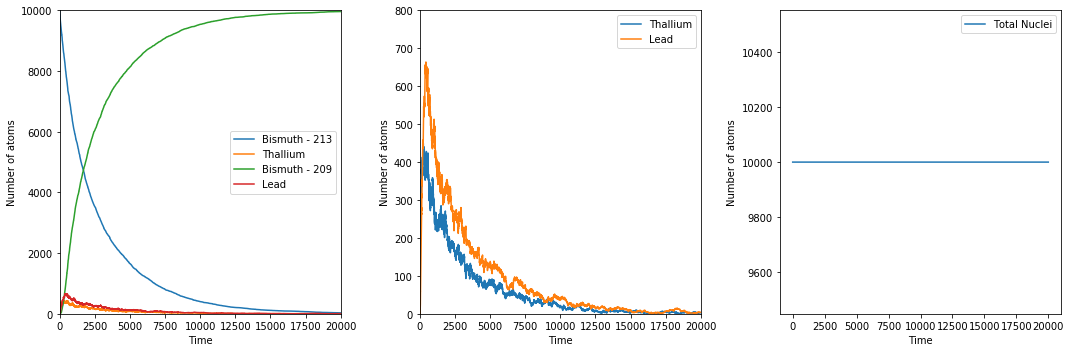

In [7]:
import pylab as plt

# Populations
IBI = 10000 # Population of Bi-213; stands for "initial bismuth"
SBI = 0 # Population of Bi-209; stands for "secondary bismuth"
Tl = 0 # Population of Thallium
Pb = 0 # Population of lead

# Step size
h = 1 # Time increment in seconds

# Half-lives
TauBI = 46 * 60 # Half life in seconds of IBI
TauTL = 2.2*60 # Half life in seconds of Tl
TauPB = 3.3*60 # Half life in seconds of Pb

# Probabilities
p1 = 1 - 2**(-h/TauBI) # Probability of IBI decaying into PB; its complement is the probability of decay into Tl
pTl = 1 - p1 #0.0209 # Probability that an IBI decay turns into Tl
p2 = 1 - 2**(-h/TauTL)
p3 = 1 - 2**(-h/TauPB)
tmax = 20000 # Total time

# Creating data lists
IBIlist = []
SBIlist = []
Tllist = []
Pblist = []
Sum = []
tpoints = arange(0.0, tmax, h)

# Main Loop
for t in tpoints:
    IBIlist.append(IBI)
    SBIlist.append(SBI)
    Tllist.append(Tl)
    Pblist.append(Pb)
    Sum.append(IBI + SBI + Tl + Pb)
    
    #Calculating decay for IBI
    decay = 0
    for i in range(IBI):
        if random() < p1:
            decay += 1
            if random() < pTl:
                IBI -= decay
                Tl += decay
            else:
                IBI -= decay
                Pb += decay
    
    # Calculating decay for Tl
    decay = 0
    for i in range(Tl):
        if random() < p2:
            decay += 1
            Tl -= decay
            Pb += decay
    
    #Calculating decay for Pb
    decay = 0
    for i in range(Pb):
        if random() < p3:
            decay += 1
            Pb -= decay
            SBI += decay
            
# Plot the data
plt.matplotlib.rcParams['figure.figsize'] = [15,5]

#Subplot 1
plt.subplot(1,3,1)

#Bismuth-213 Plot
plt.plot(tpoints,IBIlist, label = "Bismuth - 213")
xlabel("Time")
ylabel("Number of atoms")
plt.xlim(0,20000)
plt.ylim(0,10000)
legend(loc = "best")

#Thallium Plot
plt.plot(tpoints,Tllist, label = "Thallium")
xlabel("Time")
ylabel("Number of atoms")
legend(loc = "best")

#Bismuth-209 Plot
plt.plot(tpoints,SBIlist, label = "Bismuth - 209")
xlabel("Time")
ylabel("Number of atoms")
legend(loc = "best")

#Lead Plot
plt.plot(tpoints,Pblist, label = "Lead")
xlabel("Time")
ylabel("Number of atoms")

legend(loc = "best")


#Subplot 2 - Low Populations
plt.subplot(1,3,2)

#Thallium Plot
plt.plot(tpoints,Tllist, label = "Thallium")
xlabel("Time")
ylabel("Number of atoms")
plt.xlim(0,20000)
plt.ylim(0,30)
legend(loc = "best")

#Lead Plot
plt.plot(tpoints,Pblist, label = "Lead")
xlabel("Time")
ylabel("Number of atoms")
plt.xlim(0,20000)
plt.ylim(0,800)
legend(loc = "best")

#Subplot 3 - Sum
plt.subplot(1,3,3)
plt.plot(tpoints,Sum, label = "Total Nuclei")
xlabel("Time")
ylabel("Number of atoms")
legend(loc = "best")

#plt.subplots_adjust(wspace = 0.5)
plt.tight_layout()
plt.show()

As can be seen above, Bismuth-213 decays very slowly compared to its decay results. Lead, being produced by both Bismuth-213 and Thallium decaying, manages to exist in a noticeable amount due to the rates of decay, as well as being the "preferred" decay for Bismuth-213. Thallium, with its shorter half-life and lower preference, doesn't show up on the graph before decaying. If one wanted to see more of it, they could probably reduce the step size to see it, as the model gets more accurate as the time gets smaller.

## Exercise 10.4 - Radioactive Decay Again

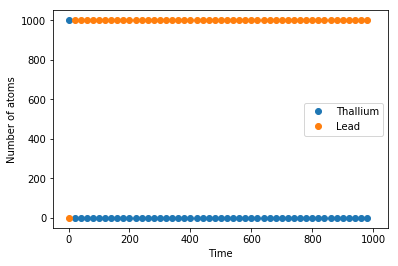

In [3]:
from numpy import log, exp, sort

# Constants
NTl = 1000 # Number of thallium atoms
NPb = 0 # Number of lead atoms
tau = 3.053 * 60 # Half life of thallium in seconds
h = 1.0 # Size of time steps in seconds
tmax = 1000 # Total time
mu = log(2)/tau

# Lists of plot points
tpoints = arange(0.0, tmax, h) # List of times
Tlpoints = [] # List of Thallium populations
Pbpoints = [] # List of Lead populations
decaytimes = [] # A randomly generated set of times when a decay is expected. Each time correspons to one decay

#Filling decay points
for i in range (len(tpoints)):
    x = -(1/mu)*log(1-random()) # Generates a set of random numbers based on a non-uniform probability curve
    decaytimes.append(x)
decaytimes = sort(decaytimes)

oldTime=0
# Main loop
for t in range(len(tpoints)):
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    decay = 0
    for k in range(len(decaytimes)):
        if(decaytimes[t] > oldTime and decaytimes[t] < tpoints[t]):
            decay+=1
    NTl -= decay
    NPb += decay
    if (NTl < 0):
        NTl = 0
    oldTime = tpoints[t]

# Make a graph
plot(tpoints,Tlpoints, "o", label = "Thallium", markevery =20)
plot(tpoints,Pbpoints, "o", label = "Lead", markevery =20)
xlabel("Time")
ylabel("Number of atoms")
legend(loc = "best")
show()

## Example 10.2 - Rutherford Scattering

In [ ]:
from math import sqrt, log, cos, sin, pi
from random import random

# Constants
Z = int(input("Please enter the atomic number of the target nucleus: "))
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.29e-11
sigma = a0/100
N = 1000000

#Function to generate two Gaussian random numbers
def gaussian():
    r = sqrt(-2*sigma*sigma*log(1-random()))
    theta = 2*pi*random()
    x = r*cos(theta)
    y = r*sin(theta)
    return x,y

#Main Program
count = 0
for i in range(N):
    x,y = gaussian()
    b = sqrt(x*x+y*y)
    if b<Z*e*e/(2*pi*epsilon0*E):
        count+=1
print(count,"particles were reflected out of",N)

## Exercise 10.3 - Brownian Motion

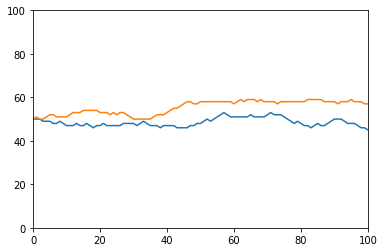

In [6]:
import pylab as plt

# Constants
L = 101
steps = 1000
p = 0.5 # Sets probability of L/R versus U/D and the probabilities versus their own components
h = 1 #Sets step size of 1
tpoints = arange(0.0, steps, h) # Time
tupleinit = (L-1)/2 , (L-1)/2 #Starting position
coordinates = [] # Creates tuple list

# Step production and border checker
def borderPatrol (a,b):
    L = 101
    step = 1
    if random()<p:
        if random()<p:
            direction = "Up"
        else:
            direction = "Down"
    else:
        if random()<p:
            direction = "Left"
        else:
            direction = "Right"
    
    if ((a+step)<L and (a+step)>=0 and (b+step)<L and (b+step)>=0):
        if (direction == "Up"):
            return a, b+step
        elif (direction == "Down"):
            return a, b-step
        elif (direction == "Left"):
            return a-step, b
        else:
            return a+step, b
    else:
        return borderPatrol(a,b)

#Main Body
a, b = tupleinit
for i in range (steps):
    if (i==0):
        coordinates.append(tupleinit) #Sets start
    else:
        a, b = borderPatrol(a,b)
        coordinates.append((a,b))
    
#print(coordinates)
c = d= []
for i in range(len(coordinates)):
    c.append(coordinates[i][0])
    d.append(coordinates[i][1])

plt.plot(coordinates)
#plt.scatter(c,d)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()